In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import pickle



In [2]:
vp = pd.read_csv(r"C:\Users\Vansh\Downloads\email spam data.csv")

In [3]:
vp

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
vp.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
vp.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [6]:
vp.info

<bound method DataFrame.info of             Category                                            Message
0                ham  Go until jurong point, crazy.. Available only ...
1                ham                      Ok lar... Joking wif u oni...
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...
3                ham  U dun say so early hor... U c already then say...
4                ham  Nah I don't think he goes to usf, he lives aro...
...              ...                                                ...
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

[5573 rows x 2 columns]>

In [7]:
vp.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
vp.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
vp.duplicated

<bound method DataFrame.duplicated of             Category                                            Message
0                ham  Go until jurong point, crazy.. Available only ...
1                ham                      Ok lar... Joking wif u oni...
2               spam  Free entry in 2 a wkly comp to win FA Cup fina...
3                ham  U dun say so early hor... U c already then say...
4                ham  Nah I don't think he goes to usf, he lives aro...
...              ...                                                ...
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

[5573 rows x 2 columns]>

In [10]:
vp.size

11146

In [11]:
vp.shape

(5573, 2)

In [12]:
vp = vp.rename (columns = {"Category":"Target"})

In [13]:
vp.Target

0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Target, Length: 5573, dtype: object

In [14]:
vp["Target"].unique

<bound method Series.unique of 0                  ham
1                  ham
2                 spam
3                  ham
4                  ham
             ...      
5568               ham
5569               ham
5570               ham
5571               ham
5572    {"mode":"full"
Name: Target, Length: 5573, dtype: object>

In [15]:
vp.duplicated().sum()

415

In [16]:
encoder = LabelEncoder()
vp["Target"] = encoder.fit_transform(vp["Target"])
vp["Target"]

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    2
Name: Target, Length: 5573, dtype: int32

In [17]:
vp.head(5)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


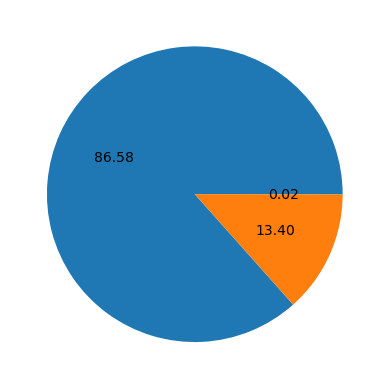

In [19]:
labels = list(vp)

plt.pie(vp["Target"].value_counts(), autopct = "%.2f")
plt.show()

In [20]:
x = vp["Message"]
y = vp["Target"]

In [21]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    2
Name: Target, Length: 5573, dtype: int32

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.33, random_state = 43)

In [23]:
cv = CountVectorizer()

In [24]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [25]:
print(x_train_cv)

  (0, 6315)	1
  (0, 6222)	1
  (0, 1357)	1
  (0, 3677)	2
  (0, 786)	1
  (0, 3686)	1
  (0, 1731)	1
  (0, 4034)	1
  (0, 4368)	1
  (0, 5489)	1
  (0, 4992)	1
  (0, 2927)	1
  (0, 1941)	1
  (0, 3107)	1
  (0, 5527)	1
  (0, 6861)	1
  (1, 3830)	1
  (1, 4509)	1
  (1, 7050)	1
  (1, 2687)	1
  (2, 5727)	1
  (2, 3625)	1
  (2, 3058)	1
  (2, 983)	1
  (2, 4593)	1
  :	:
  (3729, 1277)	1
  (3729, 1)	1
  (3729, 1455)	1
  (3729, 7)	1
  (3729, 16)	1
  (3729, 5094)	1
  (3729, 974)	1
  (3729, 267)	1
  (3729, 1320)	1
  (3729, 196)	1
  (3730, 4509)	1
  (3730, 3850)	1
  (3731, 1470)	1
  (3731, 1072)	1
  (3731, 3325)	1
  (3731, 6253)	1
  (3731, 3962)	1
  (3731, 6772)	1
  (3731, 7041)	1
  (3732, 3686)	1
  (3732, 1447)	1
  (3732, 1001)	1
  (3732, 4042)	1
  (3732, 3325)	1
  (3732, 4060)	1


In [26]:
#logisticregression model
lr = LogisticRegression()

In [27]:
lr.fit(x_train_cv, y_train)
prediction_train = lr.predict(x_train_cv)

In [28]:
# accuarcu metris trai model
print(accuracy_score (y_train, prediction_train)*100)

99.8660594695955


In [29]:
prediction_test = lr.predict(x_test_cv)

In [30]:
# accuarcy metrics test model
print(accuracy_score (y_test, prediction_test)*100)

97.5


In [31]:
print(accuracy_score(x_train, prediction_train)*100)

0.0


In [32]:
print(accuracy_score(x_test,prediction_test)*100)

0.0


In [35]:
import pickle

file = open("logistic_regression.pkl","wb") # model saved

pickle.dump(lr,file)

In [36]:
with open("logistic_regression.pkl", "rb") as f:
    model = pickle.load(f)